Name: Jan Hubrich, Vincent Mader

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Computational Physics: Exercise Sheet 1

### Task 3: Numerical Integration

### Task 4: Numerical Simulation of the 2-Body Problem

- two gravitationally bound objects
$$M_1\ddot{r_1} = -G \frac{M_1M_2}{r_{12}^2}\cdot \frac{\vec{r_{12}}}{r_{12}}$$
- step-by-step Euler integration (forward method)
- which velocity leads to circular orbits with distance 1?
$$|F_Z| = |F_G| \rightarrow v = \sqrt{\frac{GM}{2R}} = \frac{1}{\sqrt{2}}$$





In [8]:
G, M1, M2 = 1, 1, 1

norm = lambda vec: sum([i**2 for i in vec])**.5

In [10]:
def calculate_orbit(Δt, N, v0, mode = 'default'):
    #
    ΔE = []
    
    p10, v10 = np.array([0.5, 0, 0]), np.array([0, v0, 0])
    p20, v20 = -p10, -v10
    
    p1, v1 = p10, v10
    p2, v2 = p20, v20
    
    def calc_next_velocity(p1, p2, v1, v2):
        Δp = p2 - p1
        v1 = v1 + G * M2 / norm(Δp)**3 * Δp * Δt
        v2 = v2 - G * M1 / norm(Δp)**3 * Δp * Δt
        return v1, v2

    def calc_next_position(p1, p2, v1, v2):
        p1 += v1 * Δt
        p2 += v2 * Δt
        return p1, p2
    
    def calc_next_position_lfstart(p1, p2, v1, v2):
        p1 = p1 + v1 * Δt / 2
        p2 = p2 + v2 * Δt / 2
        return p1, p2
    
    trajectory_1, trajectory_2 = [], []
    
    if (mode == 'lf'):
        p = calc_next_position_lfstart(p1, p2, v1, v2)
        p1, p2 = p[0], p[1]
    
    for i in range(N):
        v = calc_next_velocity(p1, p2, v1, v2)
        v1, v2 = v[0], v[1]
        p = calc_next_position(p1, p2, v1, v2)
        p1, p2 = p[0], p[1]

        trajectory_1.append(p[0] + 0)
        trajectory_2.append(p[1] + 0)
        
        # calculate Runge-Lenz
        μ = 1 / (1 / M1 + 1 / M2)  # = 1/2
        M = M1
        r = p1
        v = v1
        p = M * v
        L = np.cross(r, p)
        j = L / μ
        φ = np.arctan(r[1] / r[0])
        e = np.cross(v, j) / (G * M) - r / norm(r)
        
        # calculate energy at 0-th step
        E_0 = 2 * M / 2 * v0**2 - 2 * G * M / norm(p10 - p20)
        
        # calculate energy at n-th step
        E_n = M / 2 * (norm(v1)**2 + norm(v2)**2) - 2 * G * M / norm(p1 - p2)
        
        # difference in energies
        ΔE.append(E_n)
        
        
    return (trajectory_1, trajectory_2), norm(e), ΔE

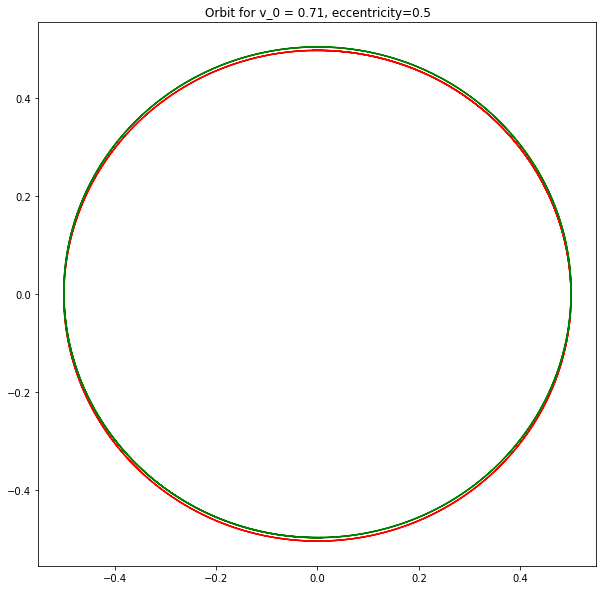

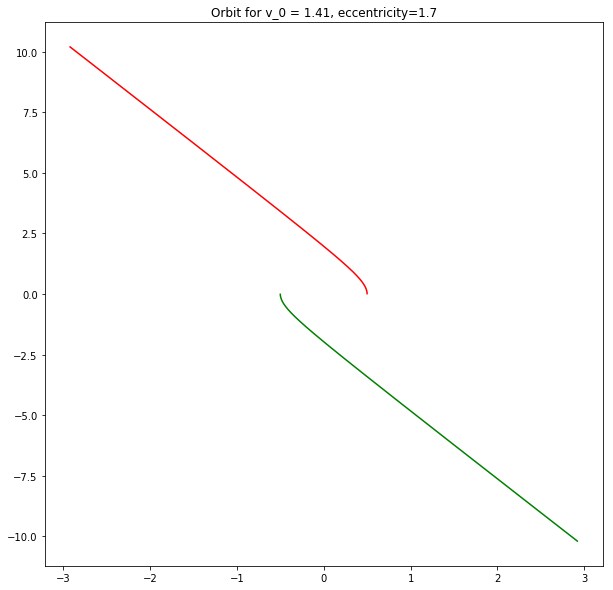

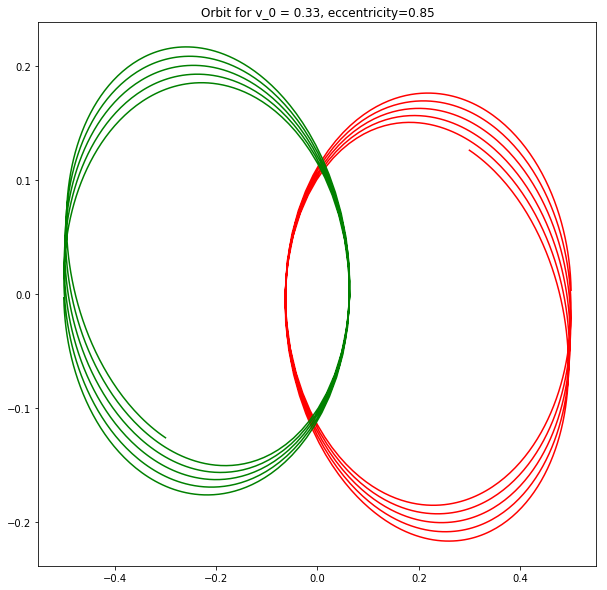

In [12]:
Δt = 0.01
N = 1000

for v0 in [1/np.sqrt(2), np.sqrt(2), 1/3]:
    trajectories, e, E = calculate_orbit(Δt, N, v0)
    
    trajectory_1, trajectory_2 = trajectories[0], trajectories[1]
    
    plt.figure(figsize=(10, 10))
    plt.title('Orbit for v_0 = {}, eccentricity={}'.format(round(v0, 2), round(e, 2)))
    
    # trajectory 1
    x = [i[0] for i in trajectory_1]
    y = [i[1] for i in trajectory_1]
    plt.plot(x, y, color='red')

    # trajectory 2
    x = [i[0] for i in trajectory_2]
    y = [i[1] for i in trajectory_2]
    plt.plot(x, y, color='green')

### Task 5: Error Analysis of Euler Scheme (HOMEWORK)

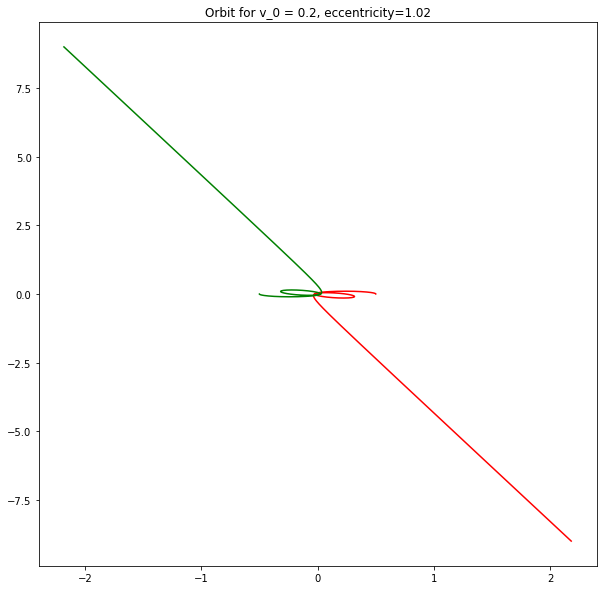

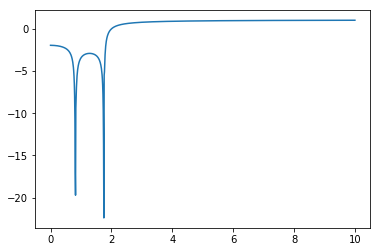

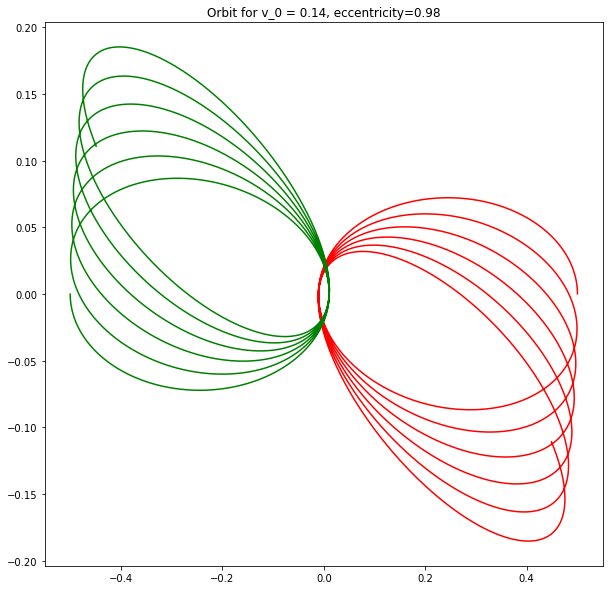

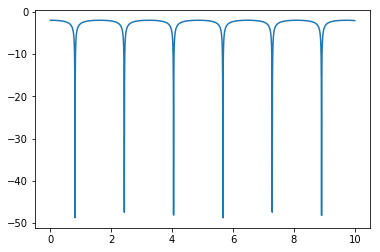

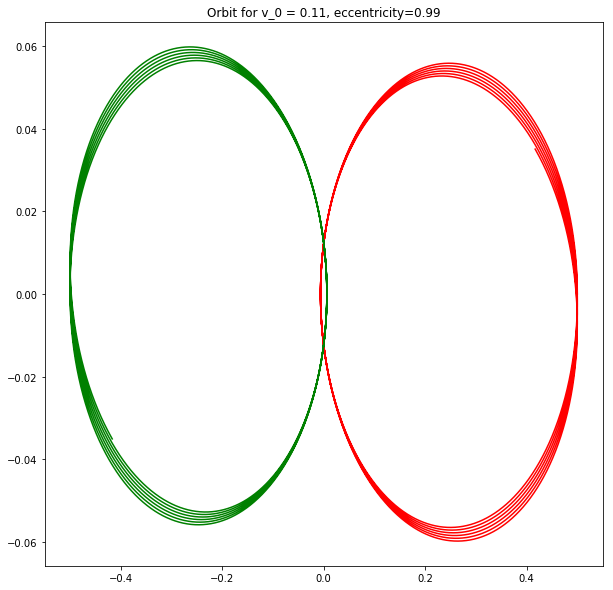

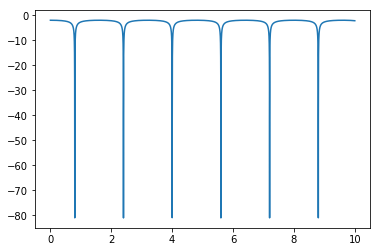

In [13]:
initial_velocites = [1/5, 1/7, 1/9]
time_steps = [0.01, 0.001, 0.0001]
Ns = [int(1000 * 0.01 / i) for i in time_steps]

for idx in range(3):
    v0 = initial_velocites[idx]
    Δt = time_steps[idx]
    N = Ns[idx]
    
    trajectories, e, ΔE = calculate_orbit(Δt, N, v0)
    
    
    plt.figure(figsize=(10, 10))
    plt.title('Orbit for v_0 = {}, eccentricity={}'.format(round(v0, 2), round(e, 2)))
    
    # trajectory 1
    x = [i[0] for i in trajectory_1]
    y = [i[1] for i in trajectory_1]
    plt.plot(x, y, color='red')

    # trajectory 2
    x = [i[0] for i in trajectory_2]
    y = [i[1] for i in trajectory_2]
    plt.plot(x, y, color='green')
    
    plt.figure()
    plt.plot(np.arange(0, N * Δt, Δt), ΔE)

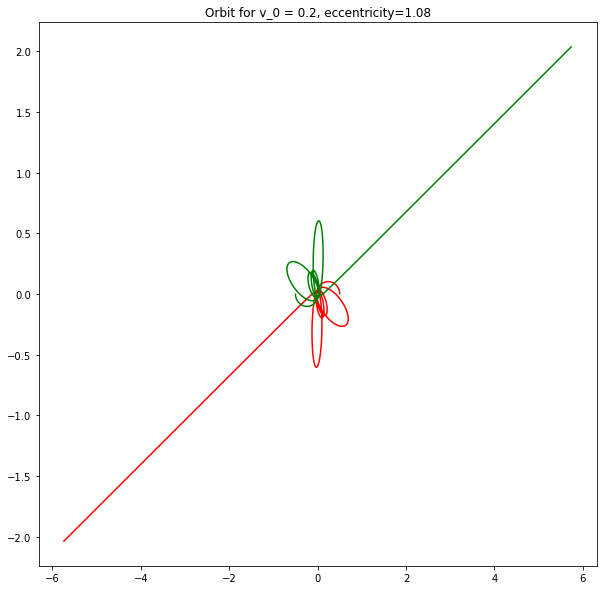

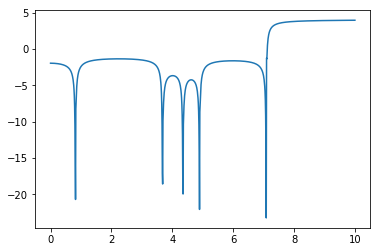

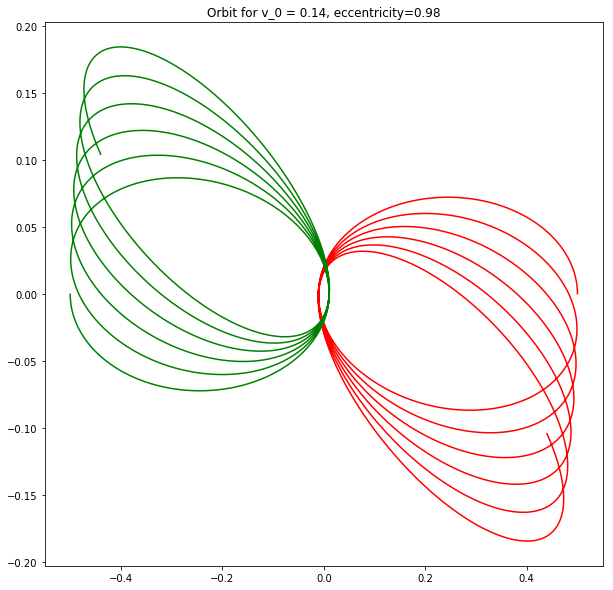

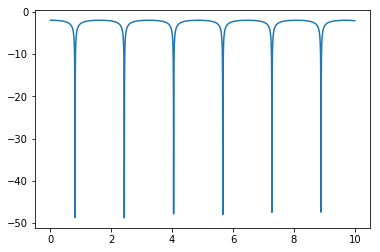

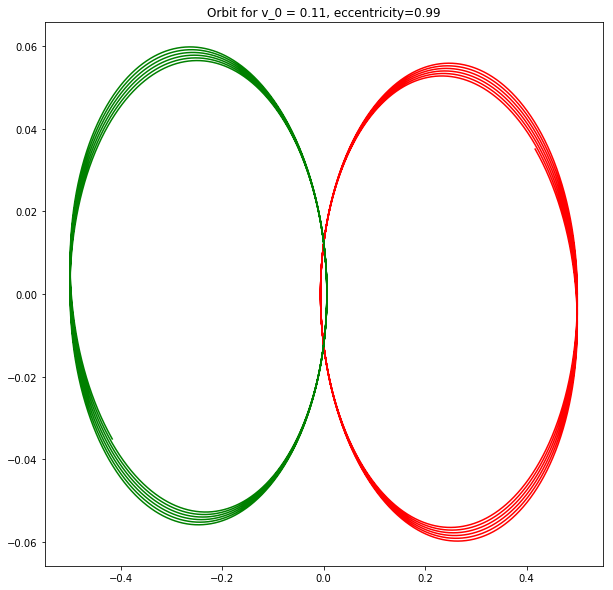

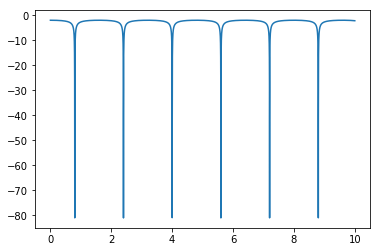

In [14]:
#leapfrog
initial_velocites = [1/5, 1/7, 1/9]
time_steps = [0.01, 0.001, 0.0001]
Ns = [int(1000 * 0.01 / i) for i in time_steps]

for idx in range(3):
    v0 = initial_velocites[idx]
    Δt = time_steps[idx]
    N = Ns[idx]
    
    trajectories, e, ΔE = calculate_orbit(Δt, N, v0, 'lf')
    
    trajectory_1, trajectory_2 = trajectories[0], trajectories[1]
    
    plt.figure(figsize=(10, 10))
    plt.title('Orbit for v_0 = {}, eccentricity={}'.format(round(v0, 2), round(e, 2)))
    
    # trajectory 1
    x = [i[0] for i in trajectory_1]
    y = [i[1] for i in trajectory_1]
    plt.plot(x, y, color='red')

    # trajectory 2
    x = [i[0] for i in trajectory_2]
    y = [i[1] for i in trajectory_2]
    plt.plot(x, y, color='green')
    
    plt.figure()
    plt.plot(np.arange(0, N * Δt, Δt), ΔE)